In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
glass=pd.read_csv("glass.csv")
glass.shape

(214, 10)

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass.isnull().mean()

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

In [6]:
glass.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


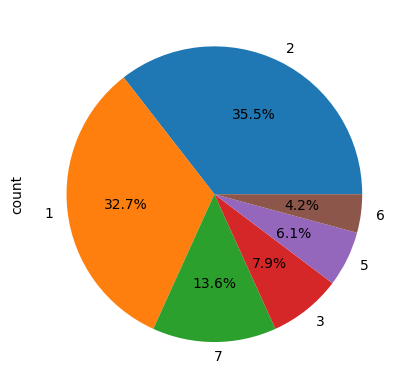

In [7]:
glass.Type.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [8]:
def plot(numerical_col):
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
    sns.kdeplot(glass[numerical_col],fill=True,ax=ax[0],color='red')
    sns.boxplot(glass[numerical_col],ax=ax[1],color='purple')
    

In [9]:
numerical_cols=[features for features in glass.columns if glass[features].dtypes=='float64']
numerical_cols

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

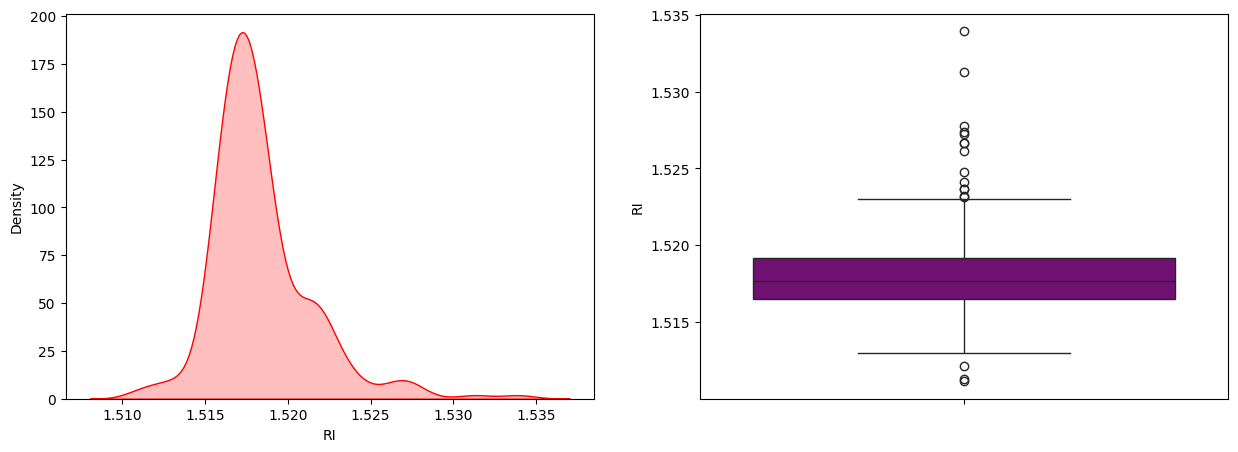

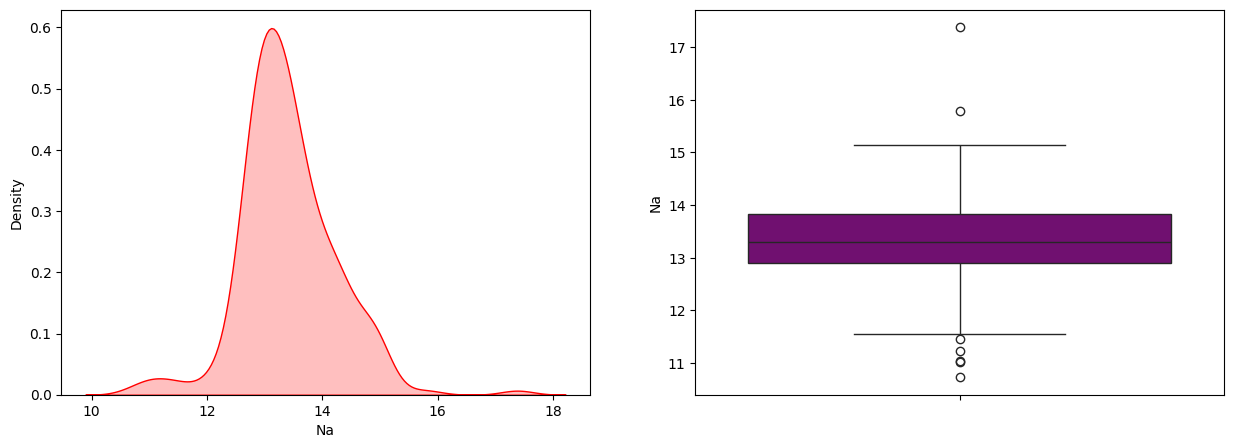

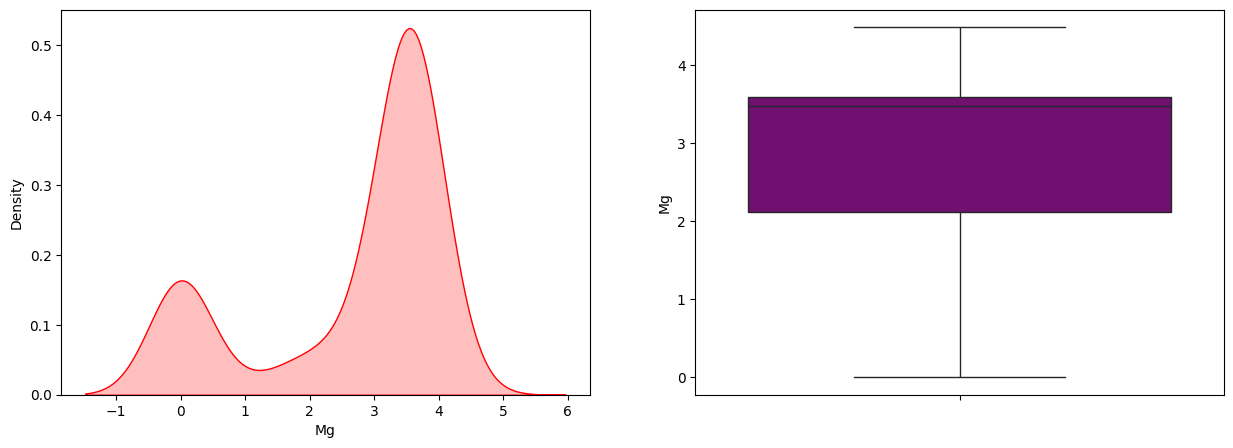

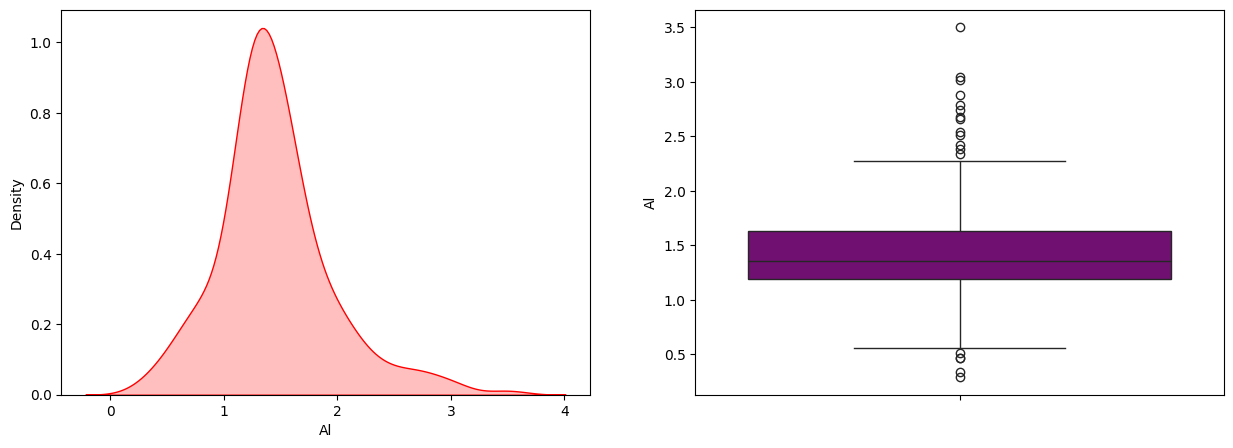

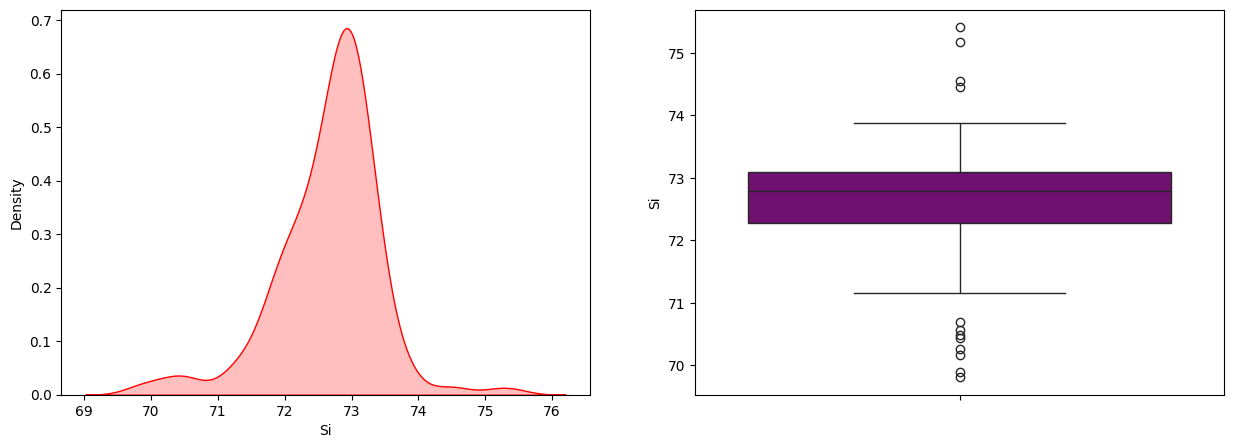

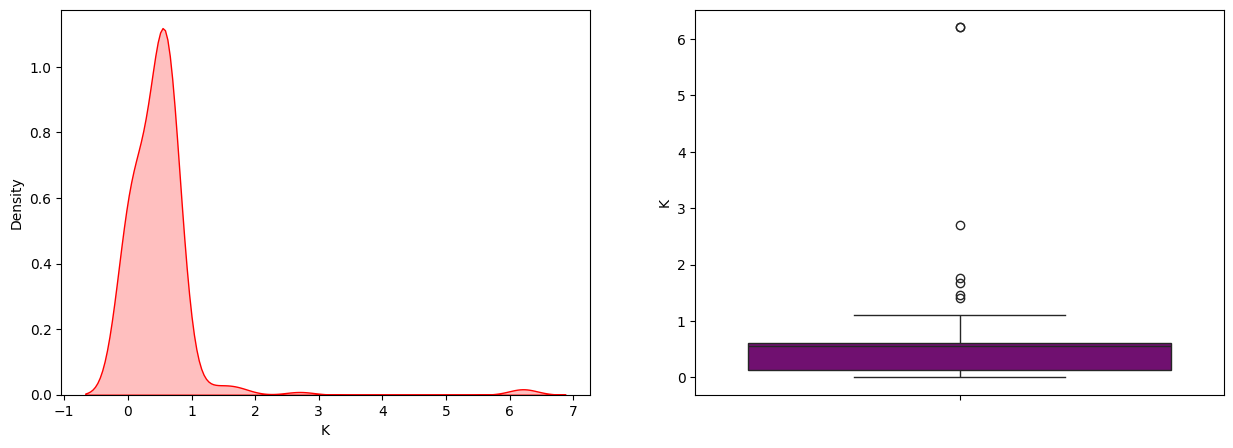

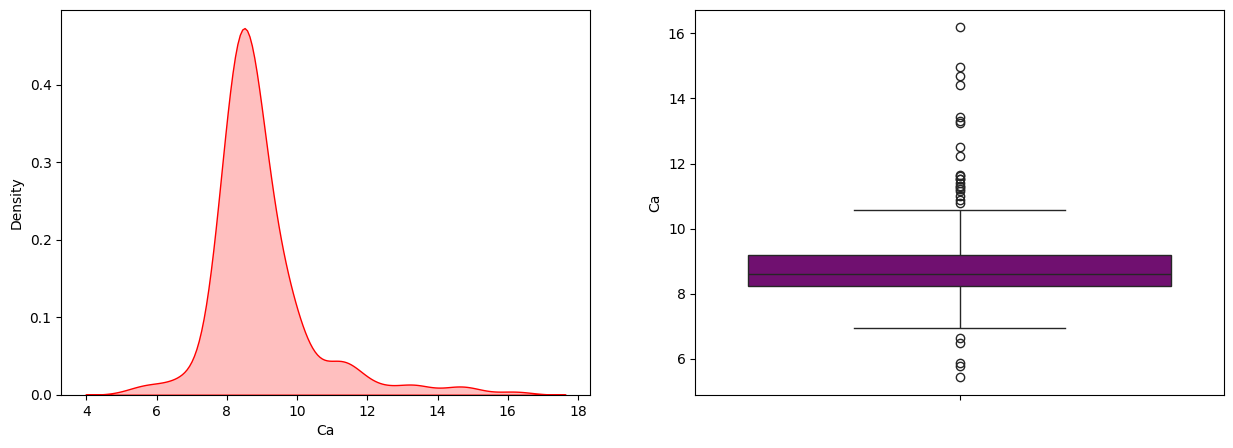

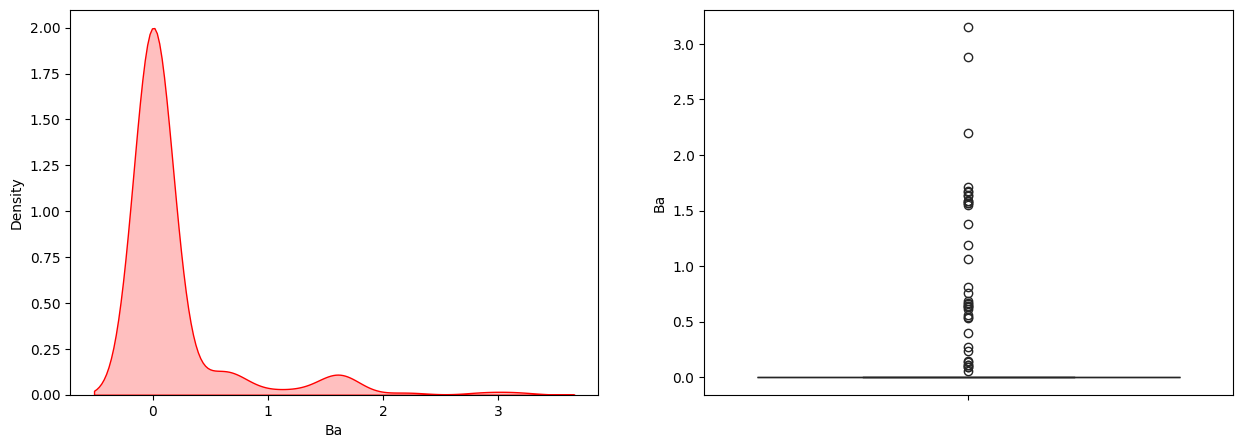

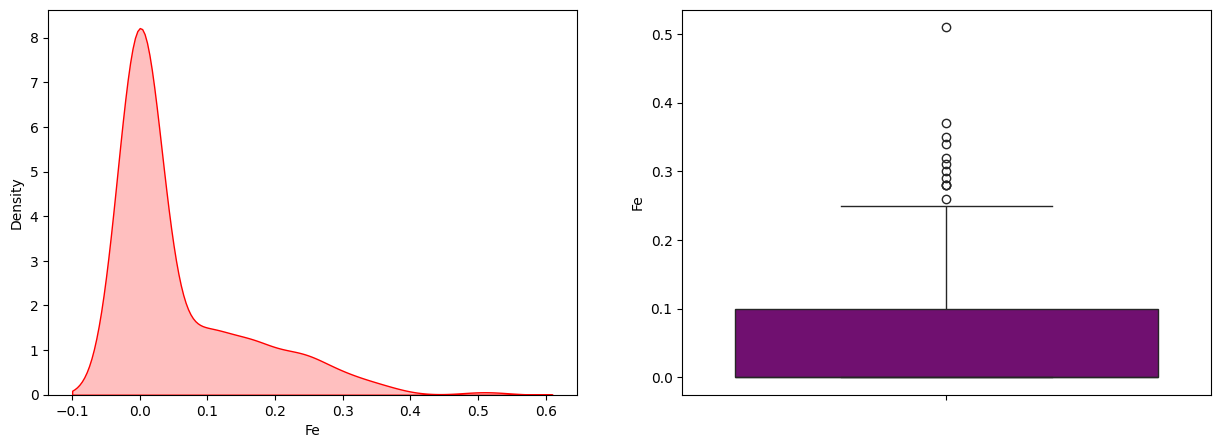

In [10]:
for i in numerical_cols:
    plot(i)

In [11]:
X=glass.drop(columns=['Type'])
Y=glass['Type']

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
knn=KNeighborsClassifier()

In [15]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [16]:
y_pred=knn.predict(X_test)

In [17]:
print(accuracy_score(y_pred,Y_test))

0.4186046511627907


In [18]:
# Finding the optimal value of k:
def knn_model(k,X_train,Y_train,X_test,Y_test):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    return accuracy_score(y_pred,Y_test)

In [19]:
results=[]
for i in range(1,11):
    score=knn_model(i,X_train,Y_train,X_test,Y_test)
    results.append(score)

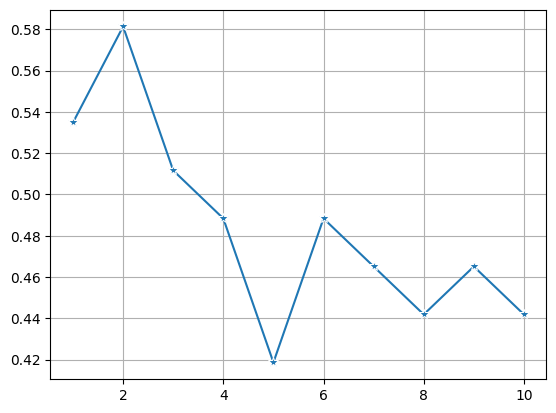

In [20]:
k_values=range(1,11)
sns.lineplot(x=k_values,y=results,marker="*",ms=7)
plt.grid(True)
plt.show()


The best value of n_neigbours is 2.